# Analyse des clusters obtenus par la méthode de clustering spectral

In [3]:
!pip install demoji
!pip install wordcloud
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.9/458.9 kB 11.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 16.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.5/806.5 kB 22.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 19.5 MB/s eta 0:00:0000:010:01


In [4]:
# téléchargement des stopwords français proposé par spacy
!python3 -m spacy download fr_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 12.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')


In [5]:
import pandas as pd
import string
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# pour prendre en charge les emojis dans les tweets
import demoji

# module pour le chargement des bases de données
import json

# gestion des stop words et de la lemmatisation avec spacy
import spacy
nlp = spacy.load('fr_core_news_md')
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

# pour l'affichage de nuages de mots
from wordcloud import WordCloud

## 1. Import des données obtenues et création de nouvelles variables

### 1.1 Création d'un dataframe contenant les tweets.

In [6]:
# l'option dtype permet d'éviter des problèmes d'encodage
df = pd.read_json("tweets.json", dtype = False)
df.head(10)

author_id          created_at edit_history_tweet_ids  \
0            523849904 2022-12-13 21:14:43  [1602774039013240833]   
1  1546342369385226242 2022-12-13 21:14:33  [1602773998110216192]   
2  1488444267223830533 2022-12-13 21:14:11  [1602773902891122689]   
3             32427970 2022-12-13 21:10:04  [1602772869561421824]   
4            572446177 2022-12-13 20:55:15  [1602769137935097856]   
5   849621947390492674 2022-12-13 20:55:14  [1602769136496828417]   
6   824256532808429568 2022-12-13 20:55:14  [1602769136496656385]   
7  1477971291651117060 2022-12-13 20:55:14  [1602769136215592960]   
8  1162370174185607170 2022-12-13 20:55:14  [1602769134776901639]   
9           1111107150 2022-12-13 20:55:14  [1602769134756007936]   

                    id                                               text  \
0  1602774039013240833  Mon mari est en dépression parce qu’on ne verr...   
1  1602773998110216192                                BIEN MESSI. #ARGCRO   
2  1602773902891122689  Les supporters argentins vont ENCORE tout cass...   
3  1602772869561421824  On ne verra plus la mannequin croate !!! C’est...   
4  1602769137935097856  Décembre 2030.\n\n8 ans plus tard, la Croatie ...   
5  1602769136496828417  Même s'il n'a pas le bon résultat, il a tout d...   
6  1602769136496656385  𝗟’𝗔𝗥𝗚𝗘𝗡𝗧𝗜𝗡𝗘 𝗘𝗡 𝗙𝗜𝗡𝗔𝗟𝗘 ! 🇦🇷\n\nDans un match où...   
7  1602769136215592960  Le GOAT est en finale de la Coupe Du Monde! 🐐\...   
8  1602769134776901639  l'Argentine qui me rappelle l'équipe d'Espagne...   
9  1602769134756007936  Finalement mes amis croates étaient médiocres ...   

                                      public_metrics  
0  {'retweet_count': 0, 'reply_count': 0, 'like_c...  
1  {'retweet_count': 0, 'reply_count': 0, 'like_c...  
2  {'retweet_count': 7, 'reply_count': 2, 'like_c...  
3  {'retweet_count': 1, 'reply_count': 0, 'like_c...  
4  {'retweet_count': 0, 'reply_count': 0, 'like_c...  
5  {'retweet_count': 0, 'reply_count': 1, 'like_c...  
6  {'retweet_count': 0, 'reply_count': 0, 'like_c...  
7  {'retweet_count': 1, 'reply_count': 0, 'like_c...  
8  {'retweet_count': 1, 'reply_count': 0, 'like_c...  
9  {'retweet_count': 0, 'reply_count': 1, 'like_c...

### 1.2 Création d'une variable contenant le numéro de cluster de chaque utilisateur dans ce dataframe créé.

On crée d'abord un dictionnaire dont les clés sont les ids des utilisateurs et les valeurs sont les numéros de cluster.

À partir de ce dictionnaire, on peut créer la liste correspondant au numéro de cluster de chaque utilisateur, dans l'ordre donné par le dataframe.

Cette liste va ensuite permettre de créer une nouvelle colonne dans le dataframe, correspondant au cluster de chaque tweet (ie de l'auteur de ce tweet).

In [7]:
# On récupère les labels de cluster
labels = np.loadtxt("labels_spectral.txt")

# On récupère le dictionnaire des utilisateurs afin de récupérer
# les ids des utilisateurs
with open('dictionnaire_following-v2.json', 'r') as fp:
    dictionnaire = json.load(fp)

# les ids des utilisateurs
keys = dictionnaire.keys()

# pour l'instant, un dictionnaire où chaque clé renvoie à None
clusters = dictionnaire.fromkeys(keys)

# pour chaque utilisateur, le numéro de cluster qui lui correspond
for i,key in enumerate(list(keys)) :
    clusters[key] = int(labels[i])

# num_cluster va être la liste correspondant au numéro de cluster
# de chaque utilisateur dans l'ordre donné par le dataframe
num_cluster = []
for id_user in df['author_id']:
    num_cluster.append(clusters.get(str(id_user)))
    
df['id_cluster'] = num_cluster

## 2. Préparation des tweets en vue d'une analyse NLP

Avant de pouvoir analyser le vocabulaire utilisé dans les tweets de chaque cluster, il est nécessaire de les modifier.

Tout d'abord, nous allons donc supprimer les stopwords, qui ne sont pas utiles dans l'analyse.

Nous allons ensuite nettoyer les tweets, c'est-à-dire supprimer la ponctuation, les majuscules, les caractères spéciaux, les emojis, etc.

Enfin, nous allons lemmatiser les mots restants afin d'éviter de faire apparaître des mots de sens proches plusieurs fois.

### 2.1 Prise en charge des stopwords

In [8]:
# rajouter les mots qui apparaissent très souvent et qui ne sont pas utiles pour l'analyse
# on doit rajouter certains mots, car la lemmatisation (cf ci-desous) bug avec ces mots
stop_words_context = ["fifaworldcup", "argcro", "argentinavscroatia","l","qu","n","ca","nl","po","ar"]

stop_words = list(fr_stop)

for stop_word in stop_words_context :
    stop_words.append(stop_word)

### 2.2 Nettoyage du texte

In [9]:
def clean(text):
    '''
    Renvoie le texte nettoyé, après application de diverses transformations
    ---------
    Entrée : text : str : Le texte à étudier
    ---------
    Sortie : str : le texte nettoyé
    
    '''
    # tout mettre en minuscules
    res = text.lower()
    
    # suppression des chiffres (pour une analyse de vocabulaire, ils ne sont pas nécessaires)
    res = ''.join([i for i in res if not i.isdigit()])
    
    # suppression des emojis
    for item in demoji.findall(res):
        res = res.replace(item,"")
        
    # suppression des mentions
    res = re.sub("@[a-z0-9_]+","", res)
    
    # suppression des hashtags
    res = re.sub("#[a-z0-9_]+","", res)
    
    #suppression des liens 
    res = re.sub("\S*https:\S*", "", res)
    res = re.sub("\S*http:\S*", "", res)
        
    # suppression de la ponctuation
    res = res.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    
    # suppression des signes qui n'ont pas été enlevés auparavant
    res = re.sub("[’“…𓃵”«»—€°♂♀]"," ",res)
    
    #suppression des caractères seules
    res = re.sub("\s\S\s"," ",res)
    
    # transformation des caractères d'espacement (hors espace) en un seul espace à chaque fois
    res = re.sub("[\t\n\r\f\v]"," ",res)
    
    # raccourcissement de plusieurs espaces en un seul
    res = re.sub("[ ]{2,}"," ",res)
    
    return (res)

### 2.3 Lemmatisation du texte

In [10]:
def text_lemmatize(text):
    '''
    Renvoie le texte lemmatisé, ie dans lequel les mots du texte
    sont remplacés par un lemme, soit une forme canonique représentative
    de tous les mots ayant un sens proche
    Grâce à cette lemmatisation, on peut aussi s'occuper des stopwords
    ---------
    Entrée : text : str : Le texte à étudier, qui n'a pas besoin d'être
    nettoyé (on appliquera cette fonction sur un texte déjà nettoyé)
    ---------
    Sortie : str : le texte lemmatisé (sans les stopwords)
    
    '''
    # création d'un objet spacy
    nlp_text = nlp(text)
    
    # on crée un dictionnaire où à chaque mot, on lui fait
    # correspondre son lemme (de type str)
    dict_lemm = {token : token.lemma_ for token in nlp_text}
    
    # on crée la liste des mots lemmatisés
    words = []
    for x in nlp_text : 
        if len(x) >= 0 :
            lemme = dict_lemm[x]
            # on vérifie que le lemme n'est pas dans les stopwords
            if not lemme in stop_words :
                words.append(dict_lemm[x])
    
    # on renvoie le texte recréé à partir de tous ses mots lemmatisés
    # auquel on a enlevé les stopwords
    return ' '.join(words)

### 2.4 Modification du dataframe

Dans le dataframe des tweets, on crée une nouvelle colonne "clean_text" qui contient le texte des tweets modifiés grâce à la fonction clean, ainsi qu'une colonne "tweet_lemma" qui contient le texte lemmatisé (et nettoyé).

In [11]:
df["clean_text"] = df["text"].apply(lambda x: clean(x))
df["tweet_lemma"] = df["clean_text"].apply(lambda x: text_lemmatize(x))
df.head()

author_id          created_at edit_history_tweet_ids  \
0            523849904 2022-12-13 21:14:43  [1602774039013240833]   
1  1546342369385226242 2022-12-13 21:14:33  [1602773998110216192]   
2  1488444267223830533 2022-12-13 21:14:11  [1602773902891122689]   
3             32427970 2022-12-13 21:10:04  [1602772869561421824]   
4            572446177 2022-12-13 20:55:15  [1602769137935097856]   

                    id                                               text  \
0  1602774039013240833  Mon mari est en dépression parce qu’on ne verr...   
1  1602773998110216192                                BIEN MESSI. #ARGCRO   
2  1602773902891122689  Les supporters argentins vont ENCORE tout cass...   
3  1602772869561421824  On ne verra plus la mannequin croate !!! C’est...   
4  1602769137935097856  Décembre 2030.\n\n8 ans plus tard, la Croatie ...   

                                      public_metrics  id_cluster  \
0  {'retweet_count': 0, 'reply_count': 0, 'like_c...         0.0   
1  {'retweet_count': 0, 'reply_count': 0, 'like_c...         1.0   
2  {'retweet_count': 7, 'reply_count': 2, 'like_c...         0.0   
3  {'retweet_count': 1, 'reply_count': 0, 'like_c...         0.0   
4  {'retweet_count': 0, 'reply_count': 0, 'like_c...         0.0   

                                          clean_text  \
0  mon mari est en dépression parce qu on ne verr...   
1                                        bien messi    
2  les supporters argentins vont encore tout cass...   
3  on ne verra plus la mannequin croate est le se...   
4  décembre ans plus tard la croatie a toujours p...   

                                         tweet_lemma  
0              mari dépression voir miss croatie cas  
1                                         bien messi  
2  supporter argentin aller casser champ elyser soir  
3          voir mannequin croate point négatif match  
4             décembre an tard croatie cadrer frappe

## 3. Affichage de la fréquence des mots sous la forme de graphiques

### 3.1 Tri des mots par nombre d'occurrences décroissant dans l'ensemble des tweets

In [42]:
def tri_occurrence (text) :
    '''
    Renvoie un tableau des mots de text triés par 
    ordre décroissant de leur fréquence
    ainsi que les fréquences correspondantes
    ---------
    Entrée : text : str : Le texte à modifier
    ---------
    Sortie : 
        mots_tries_frequence : numpy array (1) : le tableau des mots triés par fréquence
        frequences : numpy array (1) : les fréquences correspondantes
    
    '''
    # le tableau numpy contenant tous les mots
    tableau_mots = np.array(text.split())
    
    # les éléments (uniques) ainsi que leur occurrence dans l'ensemble des mots
    elements, occurrences = np.unique(tableau_mots, return_counts=True)

    # on trie par valeur décroissante de fréquence
    indices_tri_frequences = np.argsort(occurrences)[::-1]

    # les éléments dans l'ordre décroissant de leur fréquence
    mots_tries_frequence = elements[indices_tri_frequences]

    return (mots_tries_frequence,occurrences[indices_tri_frequences]/sum(occurrences))

In [43]:
# malheureusement, on est obligé de retransformer le texte à chaque fois car les fonctions
# to_string() permettant de transformer une colonne de dataframe en str ne renvoie pas un
# résultat permettant d'étudier la fréquence des mots (numéros de ligne, ponctuation impromptues,...)
ensemble_tweets = text_lemmatize(clean(df["text"].to_string()))
tweets_tries_frequence,frequences = tri_occurrence (ensemble_tweets)
print(tweets_tries_frequence,frequences)

['messi' 'argentine' 'croatie' ... 'hu' 'quatarien' 'expédier'] [6.28180610e-02 2.07124566e-02 2.05828012e-02 ... 3.24138602e-05
 3.24138602e-05 3.24138602e-05]


### 3.2 Affichage des mots les plus fréquents sous la forme d'un histogramme

In [54]:
def affichage_histogramme(text,title) :
    '''
    Affiche l'histogramme des 10 mots les plus fréquents
    ---------
    Entrée : 
        text : str : le texte à étudier
        title : str : le titre du graphique
    ---------
    Sortie : None (Affiche l'histogramme)
    '''
    
    tweets_tries_frequence,frequences = tri_occurrence (text)
    
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 9))
    plt.xlabel("Labels les plus fréquents")
    plt.ylabel("Fréquence des labels")
    plt.grid()
    
    sns.barplot(x = tweets_tries_frequence[:10], y = frequences[:10]).set_title(title)

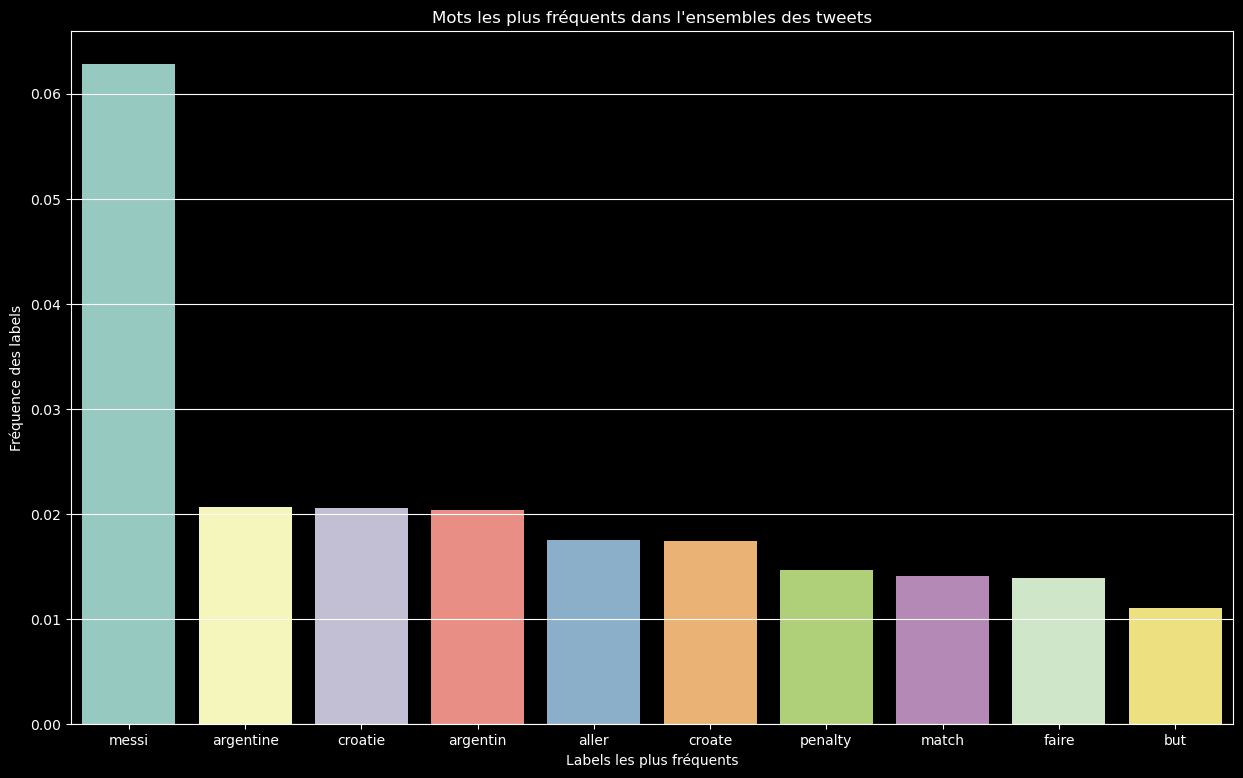

In [55]:
affichage_histogramme(ensemble_tweets,"Mots les plus fréquents dans l'ensembles des tweets")

### 3.4 Affichage des mots les plus fréquents sous la forme d'un histogramme pour chacun des clusters

In [56]:
def histogramme_cluster(cluster) :
    '''
    Affiche l'histogramme des 10 mots les plus fréquents
    pour le cluster considéré
    ---------
    Entrée : cluster : int : le numéro du cluster
    ---------
    Sortie : None (Affiche l'histogramme)
    '''
    
    # le dataframe correspondant au cluster considéré
    df_cloud = df[df['id_cluster'] == cluster]
    
    # l'ensembles des tweets à l'intérieur de chaque cluster
    ensemble_tweets_cluster = text_lemmatize(clean(df_cloud["text"].to_string()))
    
    tweets_tries_frequence,frequence = tri_occurrence (ensemble_tweets_cluster)
    
    affichage_histogramme(ensemble_tweets_cluster,"Mots les plus fréquents pour les tweets du cluster n°" + str(int(cluster)))

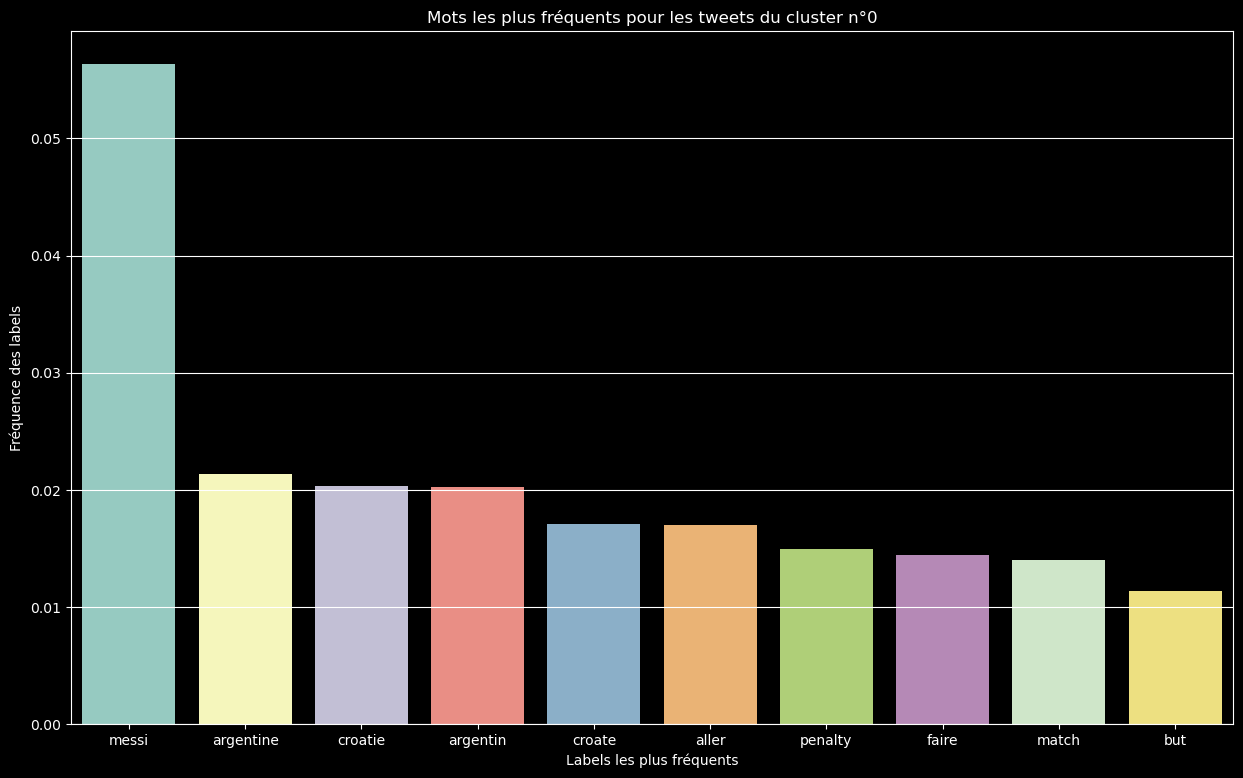

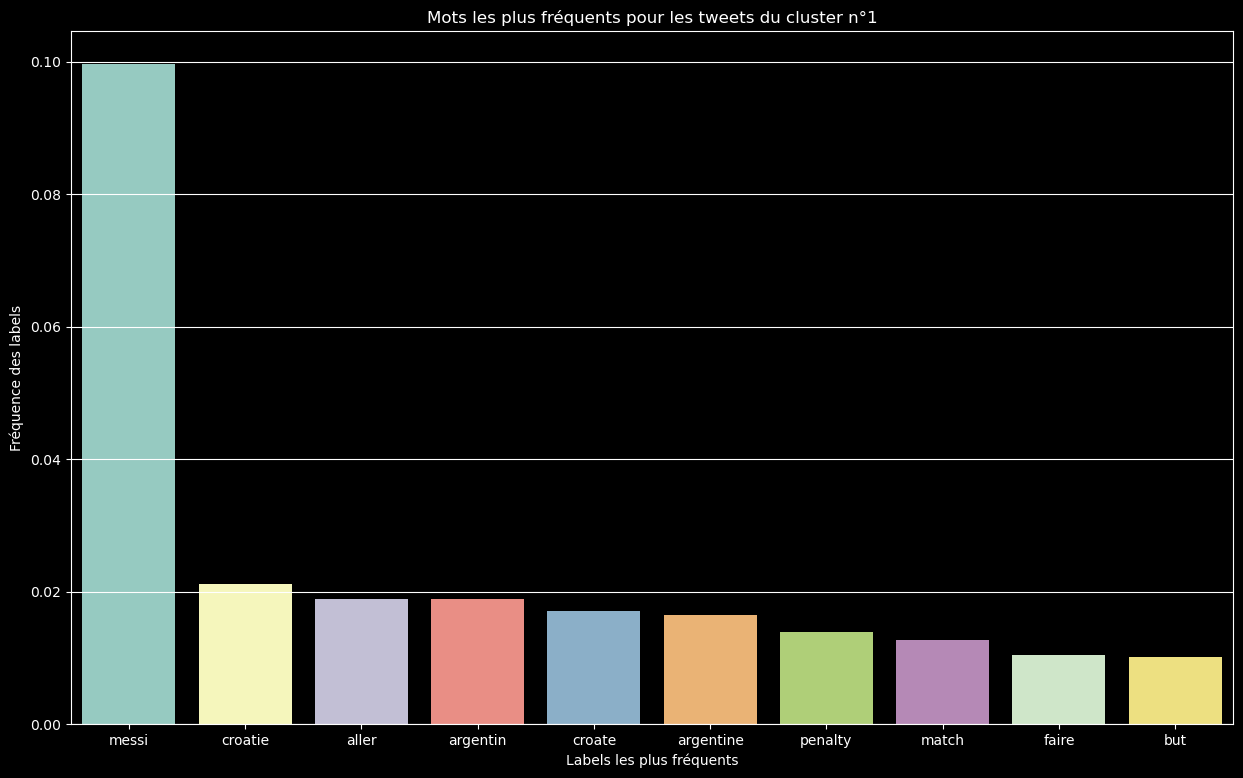

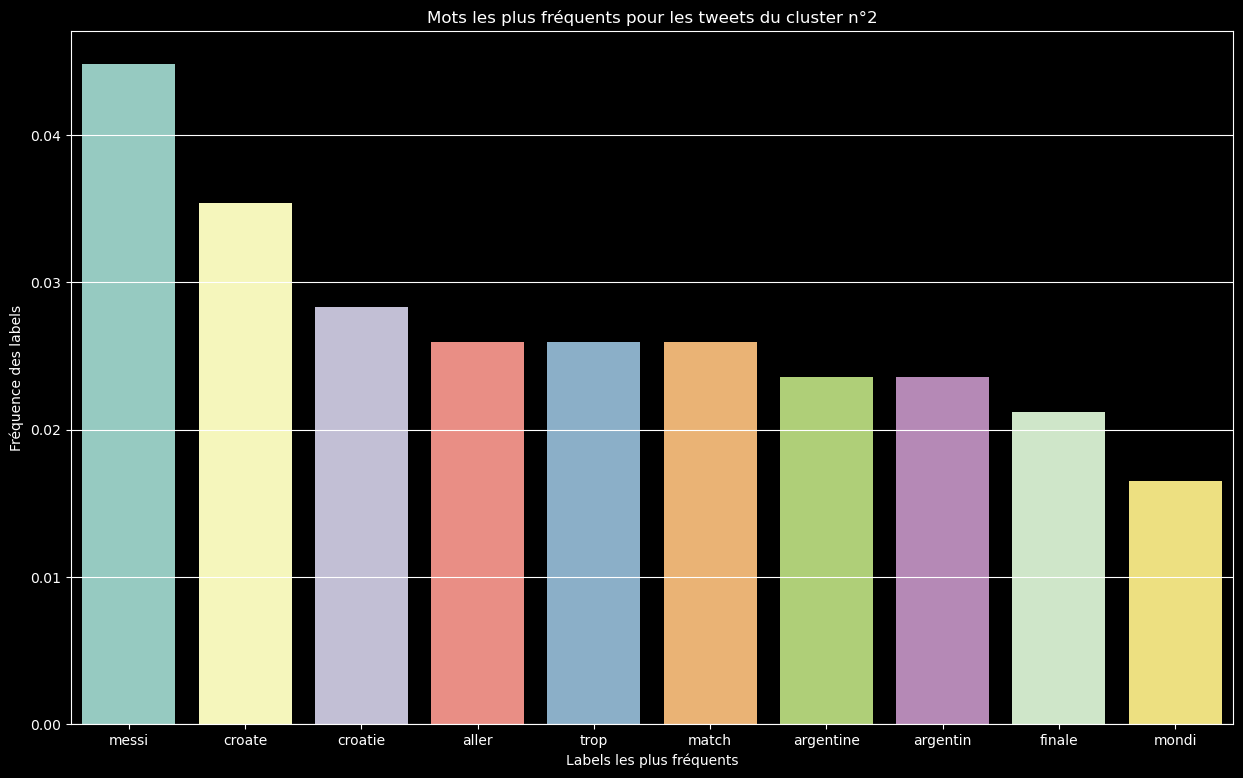

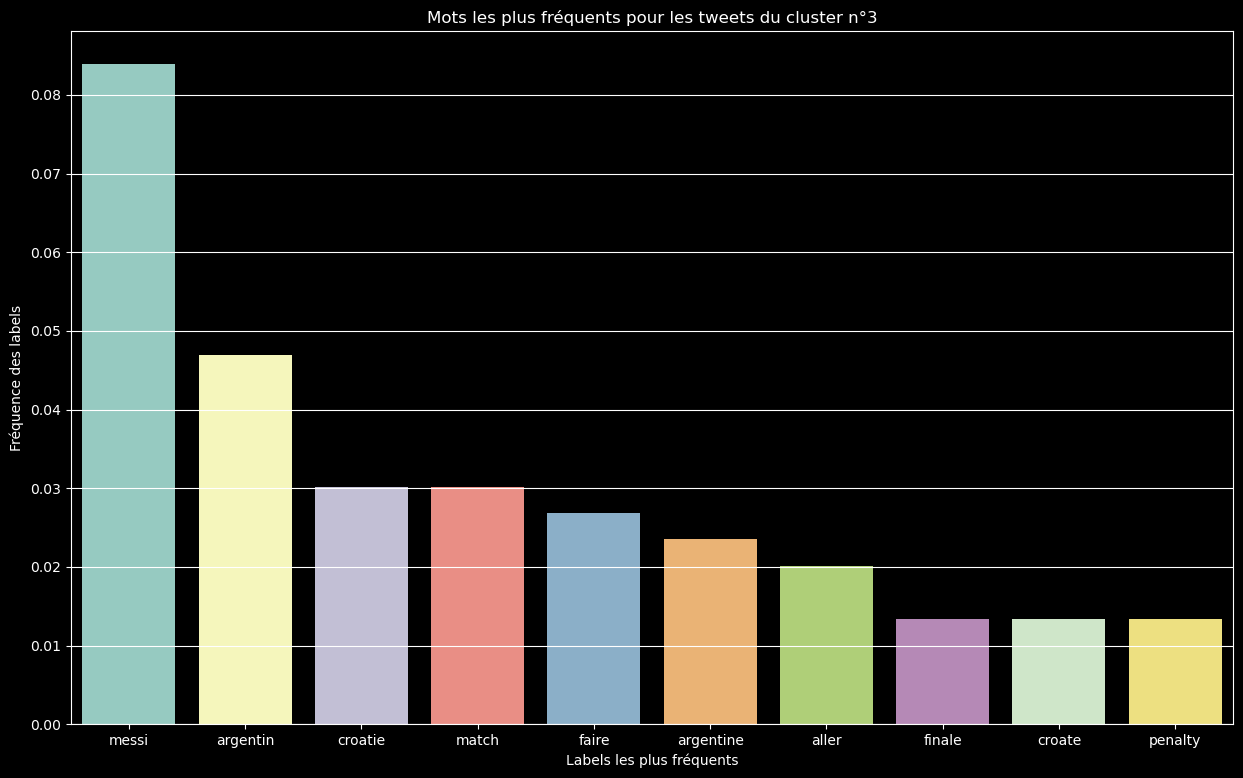

In [57]:
liste_clusters = np.unique(labels)
for cluster in liste_clusters:
    histogramme_cluster(cluster)

### 3.5 Analyse des résultats obtenus

La première observation qui saute à l'esprit lorsqu'on observe ces quatre graphiques, c'est que "messi" est le lemme le plus utilisé, quelque soit le cluster. Néanmoins, sa fréquence n'est pas la même comparativement aux autres lemmes entre les clusters. Ainsi, dans le cluster n°1, près d'un lemme sur 10 est "messi", et le deuxième lemme le plus utilisé ne représente que 2% de l'intégralité des lemmes. Ce cluster semble donc contenir principalement des fans de Messi, ou du moins des personnes qui lui accordent beaucoup de crédit. À l'inverse, dans le cluster n°2, la fréquence de "messi" n'est que de 5%, relativement proche de la fréquence du deuxième lemme qui est de 2%.

Deuxièmement, on remarque que la plupart des autres lemmes apparaissent dans chacun des quatre clusters. C'est le cas des lemmes "argentine", "croatie", "croate", "argentin", "aller" et "match". Néanmoins, il est intéressant de remarquer que les lemmes "croatie" et "croate" d'un côté, et "argentine" et "argentin" de l'autre, n'apparaissent pas avec les mêmes fréquences entre les clusters. Ainsi, des supporters de l'une ou l'autre des équipes semblent être présents dans un cluster particulier. Dans le cluster n°2, les lemmes liés à la Croatie sont nettement plus fréquents que ceux de l'Argentine (6,5 % contre 5% environ). À l'inverse, dans le cluster n°3, c'est l'Argentine qui domine largement la Croatie (7% contre un peu plus de 4%). Dans le cluster n°1, qui semblerait pour rappel comporter plutôt les fans de Messi, les fréquences des lemmes "croate" et "croatie" sont sensiblement les mêmes que celles des lemmes "argentine" et "argentin". Cela pourrait s'expliquer par le fait que ces fans de Messi sont plus interessés par ce seul joueur, que par l'issue du match en tant que telle.

Enfin, grâce à ces lemmes les plus fréquents, on pourrait essayer d'inférer à quel type de spectateurs on a affaire : sont-ils plutôt experts, ou plutôt néophytes ? Dans le cluster n°0 et 1, les lemmes "penalty" et "but" sont relativement fréquents (avec une fréquence de 2,5% à eux deux dans ces deux clusters), ce qui semble indiquer que les utilisateurs commentent sur des moments du match, et sont donc probablement plus des personnes ayant des connaissances en foot. À l'inverse, dans le cluster n°2, ces deux lemmes n'apparaissent pas dans les dix lemmes les plus utilisés. En revanche, les lemmes "aller" - pouvant correspondre à "allez" - et "trop" semblent plutôt liés à des encouragements ou des réactions. Ainsi, ce cluster contiendrait plutôt des néophytes en football.

<br />

Pour conclure, on pourrait tenter d'inférer les caractéristiques suivantes sur les clusters :

0. Le cluster n°0 contiendrait des personnes naturellement intéressées par le foot
1. Le cluster n°1 contiendrait des fans de Messi, qui plus est compétent en football
2. Le cluster n°2 contiendrait des supporters croates, peu intéressés par Messi, et plutôt néophytes en football
3. Le cluster n°3 contiendrait des supporters argentins

## 4. Création des wordclouds

### 4.1 Wordcloud de l'integralité des tweets

In [70]:
def affichage_wordcloud (text,title) :
    '''
    Affiche le wordcloud du texte rentré en argument
    ---------
    Entrée : 
        text : str : le texte à étudier
        title : str : le titre à afficher
    ---------
    Sortie : None (Affiche le worcloud)
    '''
    wordcloud = WordCloud(stopwords=stop_words, width=800, height=500,
                          random_state=21, max_font_size=110, min_word_length=4).generate(text)
    plt.figure(figsize=(19, 12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title,fontdict =  {'color': 'white',
                                 'size': 32})
    plt.axis('off')

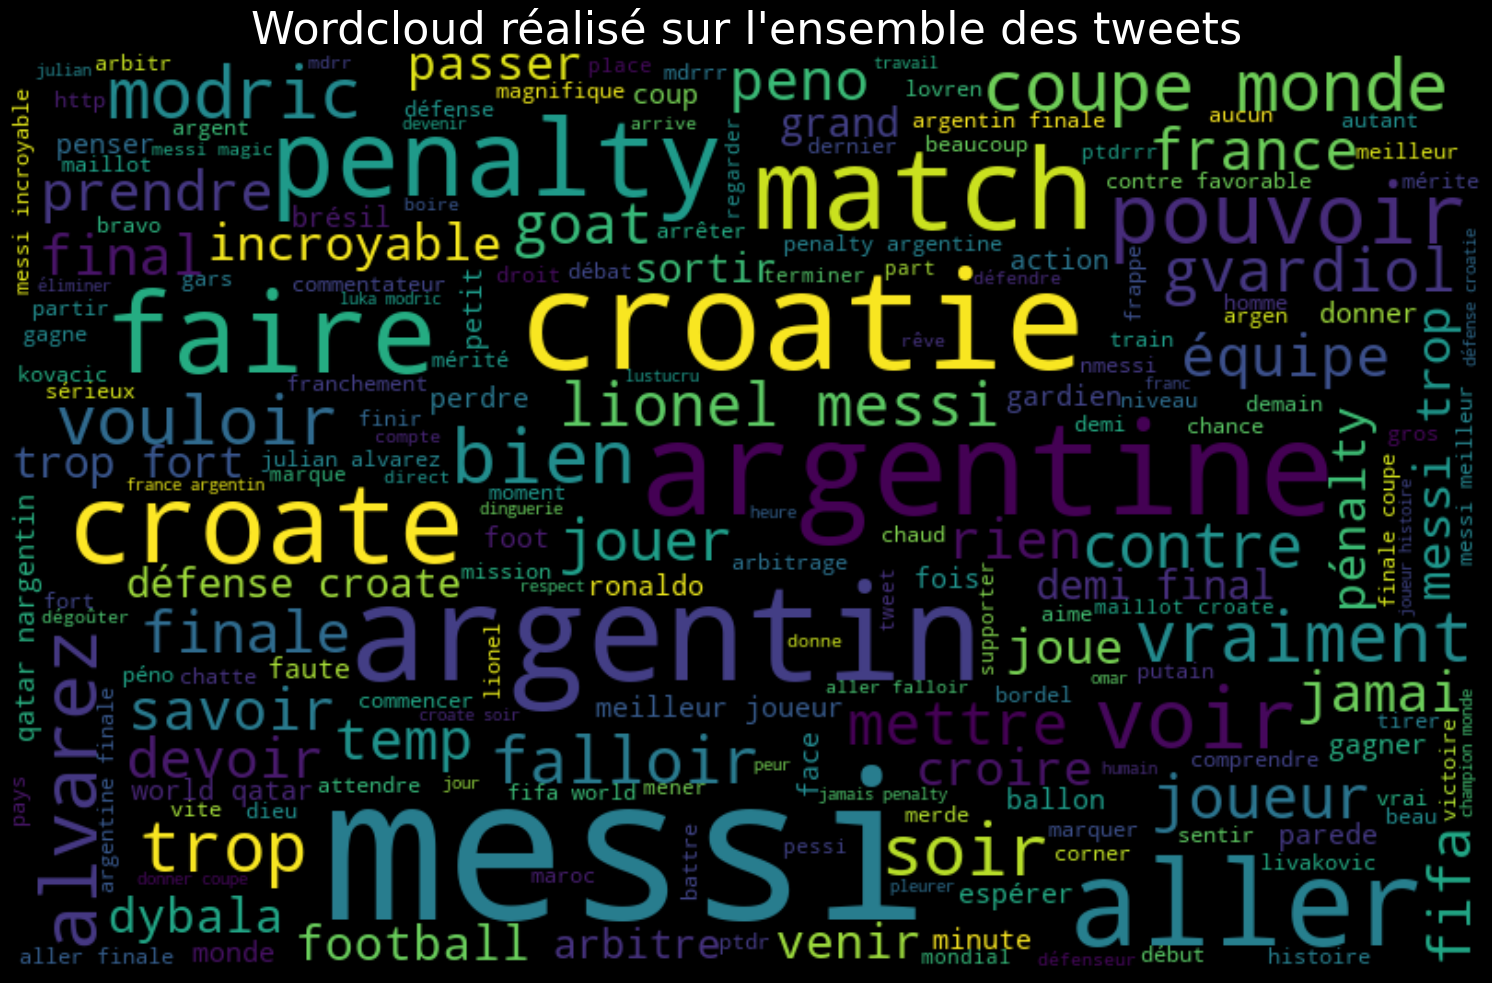

In [71]:
affichage_wordcloud(ensemble_tweets,"Wordcloud réalisé sur l'ensemble des tweets")

### 4.2 Wordcloud par cluster

In [72]:
def wordcloud_cluster(cluster) :
    '''
    Affiche le wordcloud du cluster rentré en argument
    ---------
    Entrée : cluster : int : le numéro du cluster
    ---------
    Sortie : None (Affiche le worcloud)
    '''
    
    # le dataframe correspondant au cluster considéré
    df_cloud = df[df['id_cluster'] == cluster]
    
    # l'ensembles des tweets à l'intérieur de chaque cluster
    ensemble_tweets_cluster = text_lemmatize(clean(df_cloud["text"].to_string()))
    
    affichage_wordcloud (ensemble_tweets_cluster,"Wordcloud réalisé sur le cluster n°"+str(int(cluster)))

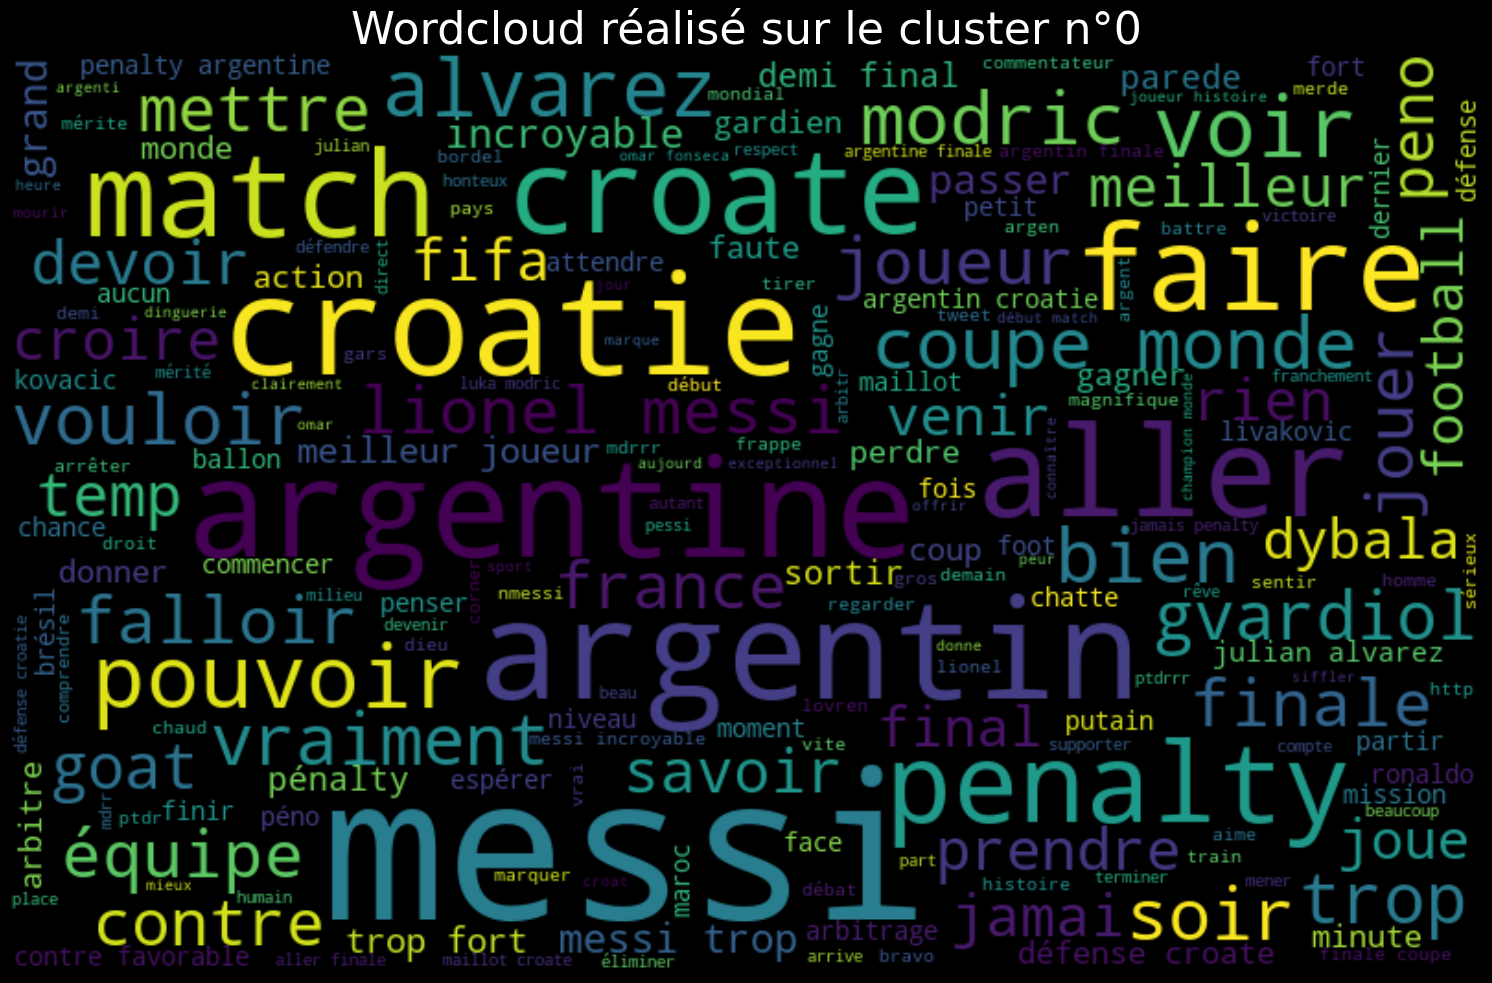

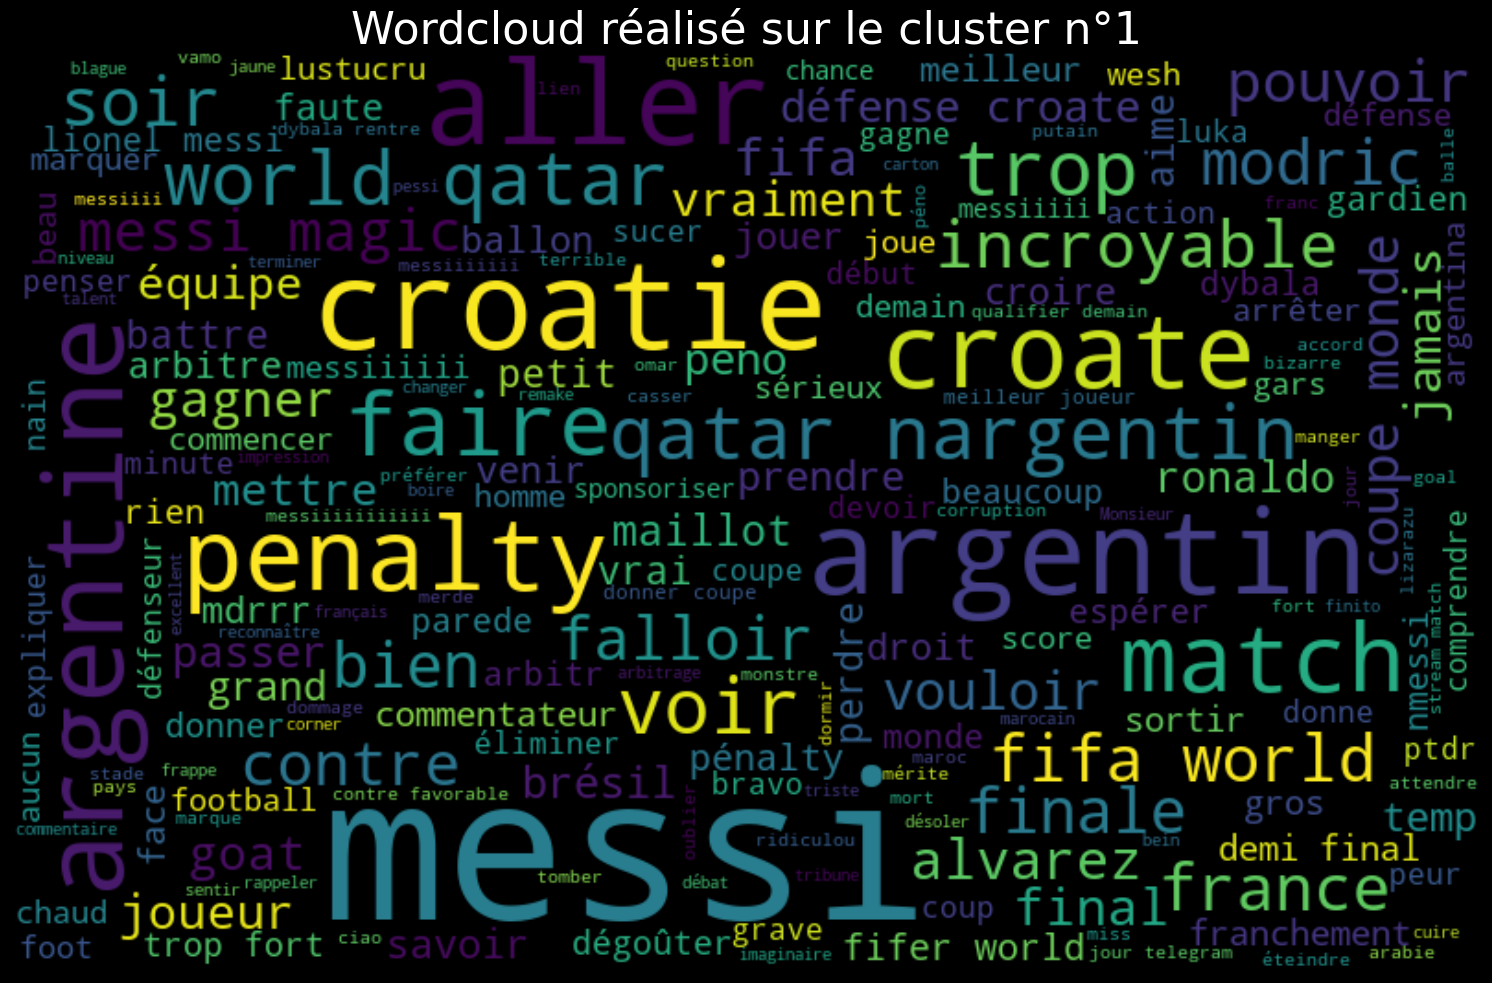

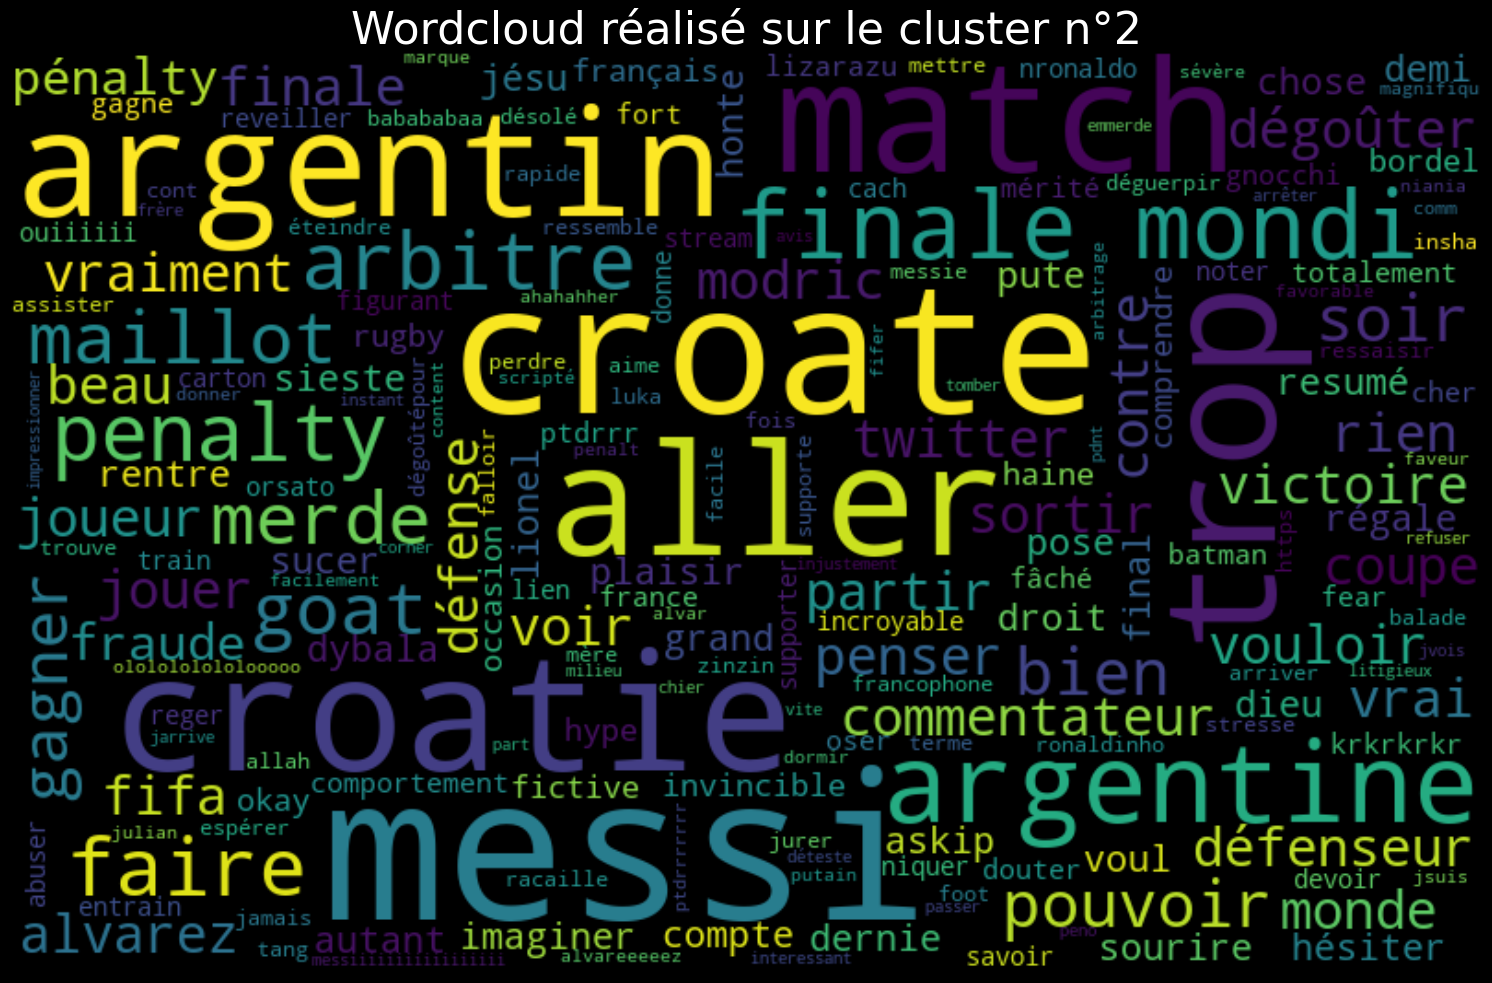

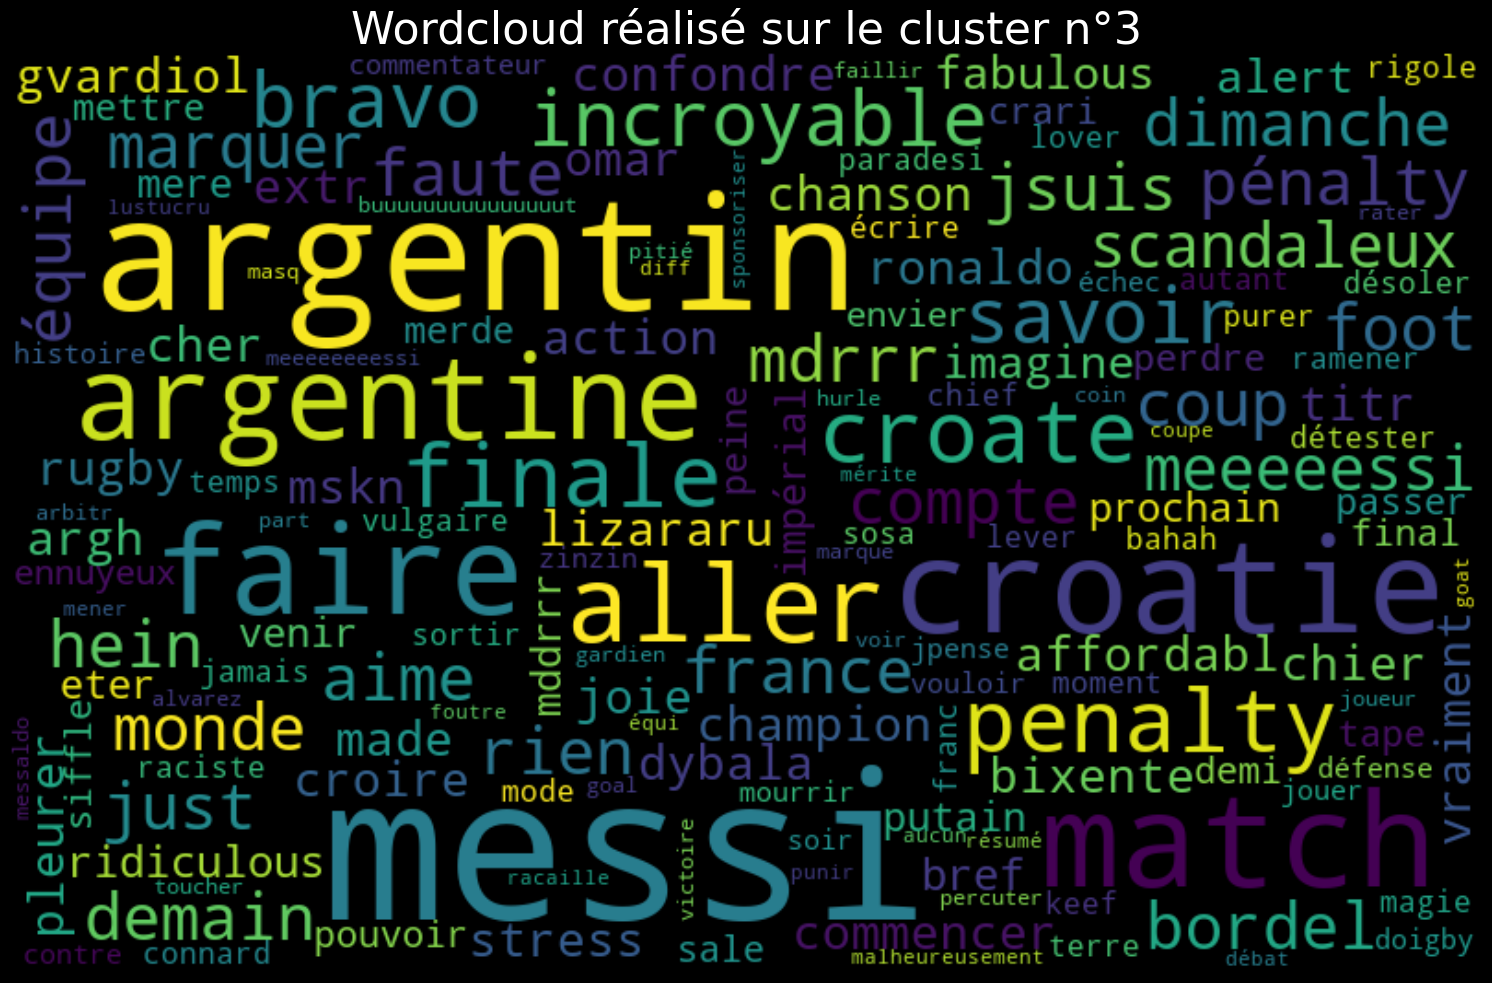

In [73]:
for cluster in liste_clusters:
    wordcloud_cluster(cluster)

### 4.3 Analyse des résultats obtenus

L'intérêt des wordclouds par rapport à la simple étude des lemmes les plus fréquents, comme fait en section 3, c'est qu'ils font apparaître de façon visuelle aussi les lemmes un peu moins fréquents. Grâce à ces lemmes moins fréquents, essayons de regarder si les conjectures faites sur les types de clusters sont validées.

0. Le wordcloud du cluster n°0 semble confirmer que les utilisateurs de ce cluster ont effectivement des connaissances en foot. En effet, on voit apparaître beaucoup de noms de joueurs autre que Messi ayant joué durant ce match - Álvarez, Modrić, Kovačić, Livaković, Dybala, Gvardiol, Paredes - ainsi que du vocabulaire précis sur le football - contre, défense, passer...
1. Dans le wordcloud du cluster n°1, on voit apparaître quelques lemmes à la louange de Messi, autre que "messi" - "goat", "messsiii" - mais moins que ce qu'on aurait pu imaginer pour pouvoir stipuler que les membres de ce cluster sont des fans de Messi.
2. En revanche, le wordcloud du cluster n°2 confirme bien les hypothèses faites précédemment. Premièrement, la plupart des lemmes présents ne sont pas spécifiques au foot, et ont donc probablement été utilisés par des novices. Deuxièmement, certains lemmes sont négatifs - "dégouté", "haine", "abuser" - ou semblent indiquer une contestation de l'arbitrage - "arbitre", "jamais". Ainsi, les membres de ce cluster sont probablement plutôt des supporters de la Croatie - pour rappel l'Argentine a gagné ce match 3-0.
3. Enfin, les lemmes du dernier wordclouds confirment légèrement les conclusions faites précédemment, puisqu'un certain nombre de lemmes positifs sont présents - "bravo", "incroyable", "joie" -, mais probablement pas en quantité suffisante pour pouvoir affirmer que les membres de ce cluster sont des supporters argentins.

## 5. Analyse des caractéristiques autres que le vocabulaire

### 5.1 Création de nouvelles variables

Pour notre analyse, il peut être utile de connaître le nombre de hashtags dans chaque tweet, le nombre de majuscules ainsi que le nombre de points d'exclamation.

In [20]:
def count_hashtags(text):
    '''
    Renvoie le nombre de hashtags dans un tweet
    -------------
    Entrée : text : str : Le texte à étudier
    -------------
    Sortie : int : Le nombre de hashtags
    '''
    # les hashtags dans un tweet sont placés avant un mot
    find = re.compile("([#]\w+)").findall(text)
    return len(find)


def count_exclamation(text):
    '''
    Renvoie le nombre de point d'exclamation dans un tweet
    -------------
    Entrée : text : str : Le texte à étudier
    -------------
    Sortie : int : Le nombre de hashtags
    '''
    # les points d'exclamation dans un texte sont placés après un mot / caractère
    find = re.compile("(\w?\s?[!])").findall(text)
    return len(find)


def count_maj(text):
    '''
    Renvoie le nombre de majuscules dans un tweet
    -------------
    Entrée : text : str : Le texte à étudier
    -------------
    Sortie : int : Le nombre de majuscules
    '''
    find = re.compile("([A-Z][A-Z]+)").findall(text)
    return len(find)



df["nb_hashtags"] = df["text"].apply(lambda x : count_hashtags(x))
df["nb_exclamation"] = df["text"].apply(lambda x : count_exclamation(x))
df["nb_maj"] = df["text"].apply(lambda x : count_maj(x))

La variable public_metrics contient un dictionnaire avec le nombre de likes, de retweets, de réponses et de tweets cités.
On va créer une variable pour chacune de ces caractéristiques, afin de pouvoir les étudier.

In [59]:
retweet_count = []
reply_count = []
like_count = []
quote_count = []

for i in range (len(df)):
    if type(df["public_metrics"][i]) is dict:
        retweet_count.append(df["public_metrics"][i].get('retweet_count'))
        reply_count.append(df["public_metrics"][i].get('reply_count'))
        like_count.append(df["public_metrics"][i].get('like_count'))
        quote_count.append(df["public_metrics"][i].get('quote_count'))
    else:
        #certains tweets ont été supprimés donc les données ne sont plus accessibles
        retweet_count.append(np.nan)
        reply_count.append(np.nan)
        like_count.append(np.nan)
        quote_count.append(np.nan)
    
df["retweet_count"] = retweet_count
df["reply_count"] = reply_count
df["like_count"] = like_count
df["quote_count"] = quote_count

### 5.2 Statistiques descriptives sur l'ensemble des tweets

In [60]:
#Pour pouvoir afficher toutes les colonnes
pd.set_option('display.max_columns', 500)

In [65]:
round(df.drop('id_cluster', axis=1).describe(), 3)

nb_hashtags  nb_exclamation    nb_maj  retweet_count  reply_count  \
count     9054.000        9054.000  9054.000       8563.000     8563.000   
mean         1.547           0.305     1.997          2.302        0.912   
std          1.193           1.043     2.296         42.172       12.260   
min          1.000           0.000     0.000          0.000        0.000   
25%          1.000           0.000     1.000          0.000        0.000   
50%          1.000           0.000     1.000          0.000        0.000   
75%          2.000           0.000     2.000          0.000        0.000   
max         18.000          22.000    38.000       2338.000      737.000   

       like_count  quote_count  
count    8563.000     8563.000  
mean       16.152        0.187  
std       201.103        3.445  
min         0.000        0.000  
25%         0.000        0.000  
50%         0.000        0.000  
75%         1.000        0.000  
max     13703.000      266.000

On remarque qu'au moins 75% des tweets n'ont aucun retweet, like ou citation, et au plus 1 like.
75% des tweets ont au plus 2 hashtags et 2 majuscules, et aucun point d'exclamation.
Certains tweets sont cependant très populaires, avec un maximum de retweets à 2338 et de likes à 13703.

### 5.3 Statistiques descriptives par cluster

In [61]:
round(df.groupby('id_cluster').describe(), 3)

nb_hashtags                                         nb_exclamation  \
                 count   mean    std  min  25%  50%  75%   max          count   
id_cluster                                                                      
0.0             7249.0  1.554  1.195  1.0  1.0  1.0  2.0  18.0         7249.0   
1.0             1504.0  1.507  1.185  1.0  1.0  1.0  1.0  12.0         1504.0   
2.0              124.0  1.331  0.751  1.0  1.0  1.0  1.0   5.0          124.0   
3.0               90.0  1.344  0.767  1.0  1.0  1.0  1.0   4.0           90.0   

                                                    nb_maj                     \
             mean    std  min  25%  50%  75%   max   count   mean    std  min   
id_cluster                                                                      
0.0         0.315  1.039  0.0  0.0  0.0  0.0  22.0  7249.0  1.999  2.339  0.0   
1.0         0.248  1.043  0.0  0.0  0.0  0.0  17.0  1504.0  1.945  2.064  0.0   
2.0         0.331  0.718  0.0  0.0  0.0  0.0   3.0   124.0  1.823  1.608  1.0   
3.0         0.422  1.729  0.0  0.0  0.0  0.0  10.0    90.0  2.244  3.084  0.0   

                                retweet_count                                \
            25%  50%  75%   max         count   mean     std  min  25%  50%   
id_cluster                                                                    
0.0         1.0  1.0  2.0  38.0        6964.0  2.718  46.625  0.0  0.0  0.0   
1.0         1.0  1.0  2.0  32.0        1352.0  0.313   4.394  0.0  0.0  0.0   
2.0         1.0  1.0  2.0  11.0         117.0  0.103   0.462  0.0  0.0  0.0   
3.0         1.0  1.0  2.0  18.0          87.0  3.828  25.682  0.0  0.0  0.0   

                        reply_count                                            \
            75%     max       count   mean     std  min  25%  50%  75%    max   
id_cluster                                                                      
0.0         0.0  2338.0      6964.0  1.045  13.517  0.0  0.0  0.0  0.0  737.0   
1.0         0.0   156.0      1352.0  0.295   3.047  0.0  0.0  0.0  0.0   84.0   
2.0         0.0     4.0       117.0  0.248   0.540  0.0  0.0  0.0  0.0    2.0   
3.0         0.0   232.0        87.0  0.862   3.232  0.0  0.0  0.0  0.0   24.0   

           like_count                                                \
                count    mean      std  min  25%  50%  75%      max   
id_cluster                                                            
0.0            6964.0  18.795  220.728  0.0  0.0  0.0  2.0  13703.0   
1.0            1352.0   2.679   26.828  0.0  0.0  0.0  1.0    852.0   
2.0             117.0   1.991    8.333  0.0  0.0  0.0  1.0     88.0   
3.0              87.0  38.908  256.623  0.0  0.0  0.0  1.0   2293.0   

           quote_count                                           
                 count   mean    std  min  25%  50%  75%    max  
id_cluster                                                       
0.0             6964.0  0.209  3.710  0.0  0.0  0.0  0.0  266.0  
1.0             1352.0  0.089  2.007  0.0  0.0  0.0  0.0   73.0  
2.0              117.0  0.043  0.242  0.0  0.0  0.0  0.0    2.0  
3.0               87.0  0.264  1.839  0.0  0.0  0.0  0.0   17.0

* **Nombre de hashtags :**   
    Dans les clusters 0 et 1, le nombre moyen de hashtags utilisés est plus grand que dans les clusters 2 et 3.
    
* **Nombre de points d'exclamation :**  
    Les moyennes sont relativement proches entre les clusters, mais elle est un peu plus élevée dans le numéro 3.  
    Cependant on remarque que dans le cluster 0, le maximum de points d'exclamation dans un tweet est de 22, alors qu'il est seulement de 3 dans le cluster 2.
    
* **Nombre de majuscules :**  
    Tout comme les points d'exclamation, le nombre moyen de majuscules dans le cluster 3 est plus élevé que dans les autres. Cependant, il faudrait rapporter ce nombre au nombre total de caractères dans un tweet pour réellement comparer. En effet, certains tweets peuvent être entièrement en majuscules tandis que d'autres n'ont que certains mots en majuscules.
    
* **Nombre de retweets, likes, réponses et citations :**  
    Il y a clairement plus de retweets dans le cluster numéro 3, avec une moyenne de 3.8 par tweet et un maximum de 232.  
    En revanche le tweet ayant récolté le plus de retweets (2338) se trouve dans le cluster 0, qui a en moyenne 2.7 retweets.  
    Les autres statistiques montrent bien que les clusters 0 et 3 sont plus populaires que les clusters 1 et 2. Ils ont à la fois plus de retweets, plus de likes, plus de réponses et plus de citations.